# Example Usage of Contours Processor

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
from contours_processor import ContourFileExtractor, ContourDataset

## Notebook Contents:

This Notebook demonstrates the capabilities of Contours processor. How you can use it to extract I-Contours and O-Contors. We will also look at both these contours Together.  It also highlights some contour files that may have incorrect contours definititons by overlaying I and O-Contours

## Coutours Processor Capabilities:

* Usage 1: Extract all contours and dicoms and save them as Numpy Array pairs.  Use that subsequently in creating dataset generator.

* Usage 2: Directly load the files and use it in Dataset Generator.

* Can be used for single contours like i-contours, o-contors by passing the primary_contour as the parameter below.


## Extract Dataset

We will first look at i-contours processing, very similar to Part 1 Challenge.

* Create a Folder called data and Unzip the dicoms and contourfiles 

In [3]:
# !mkdir data/i-contours_processed

In [4]:
# Load the link file to generate the mapping of Contours to Dicom files
def generate_contour_dicom_map(link_file):
    contour_dicom_pairs = pd.read_csv(link_file).to_dict(orient="rows")
    contour_dicom_map = {
        row["original_id"]: row["patient_id"] for row in contour_dicom_pairs
    }
    return contour_dicom_map

In [5]:
contour_dicom_map = generate_contour_dicom_map("data/final_data/link.csv")

In [6]:
contour_dicom_map

{'SC-HF-I-1': 'SCD0000101',
 'SC-HF-I-2': 'SCD0000201',
 'SC-HF-I-4': 'SCD0000301',
 'SC-HF-I-5': 'SCD0000401',
 'SC-HF-I-6': 'SCD0000501'}

## Part 1: Challenge - Extract I-Contours and Dicoms

* This is only needed for new files.  Once the files are processed into Numpy arrays, then don't need to be processed again

In [7]:
contour_top_folder = "data/final_data/contourfiles/"
dicom_top_folder = "data/final_data/dicoms/"
ICONTOUR_PROCESSED_DIR = "data/i-contours_processed/"

In [8]:
contour_extractor = ContourFileExtractor(contour_top_folder, 
                                         dicom_top_folder,
                                         primary_contour="i-contours",  # Process I-Contours
                                         on_error_action="raise",
                                         contour_dicom_folder_map=contour_dicom_map)

In [9]:
# !mkdir data/i-contours_processed

In [10]:
contour_extractor.save_datasets(output_dir=ICONTOUR_PROCESSED_DIR)

In [76]:
## These files are stored as HDF5 Files that contain the Datasets and the Sources they are based on

## Create the I-Contours Dataset

In [11]:
contours_dset = ContourDataset(contour_dicom_folder=ICONTOUR_PROCESSED_DIR,
                              x_channels="dicom",
                              y_channels="i-contours",
                              include_sources=False)

In [12]:
for dicom_data, contours_data in contours_dset.generate_batch(batch_size=8, shuffle=False):
    ## Model Training with Inputs and target for each batch
    break

In [13]:
dicom_data.shape, contours_data.shape

((8, 256, 256), (8, 256, 256))

## Visualize Data

In [14]:
dicom_data[0].shape, contours_data[0].shape

((256, 256), (256, 256))

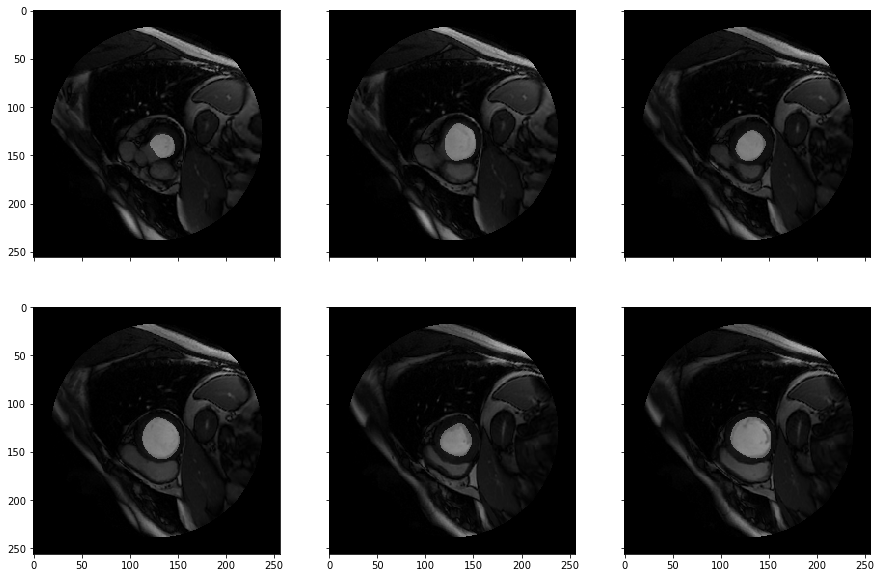

In [15]:
# Visualize a sample
fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

for idx, ax in enumerate(ax.flatten()):
    ax.imshow(dicom_data[idx], cmap=plt.cm.gray)
    ax.imshow(contours_data[idx], alpha=0.3, cmap=plt.cm.gray)

## File Generator Usage (without saving file)

* Online File Reader Generator
* When you don't want to Save the Numpy Arrays of Dicoms images and contours

In [19]:
contour_extractor = ContourFileExtractor(contour_top_folder, 
                                         dicom_top_folder,
                                         primary_contour="i-contours",
                                         contour_dicom_folder_map=contour_dicom_map)

In [20]:
contours_generator = contour_extractor.datasets_generator(shuffle=True)

In [21]:
## Use in Dataset
contours_dset = ContourDataset(contour_dicom_generator=contours_generator,
                              x_channels="dicom",
                              y_channels="i-contours",
                              include_sources=False)

In [22]:
for dicom_data, contours_data in contours_dset.generate_batch(batch_size=8, shuffle=True):
    ## Model Training with Inputs and target for each batch
    break

In [23]:
dicom_data[0].shape, contours_data[0].shape

((256, 256), (256, 256))

## Part 2 Challenge: Extract O-Contours

* Change the Output Directory to save o-contours
* Update the Channel information passed to o-contours.  Rest of the code is same as above

In [24]:
contour_top_folder = "data/final_data/contourfiles/"
dicom_top_folder = "data/final_data/dicoms/"
OCONTOUR_PROCESSED_DIR = "data/o-contours_processed/"

In [25]:
contour_extractor = ContourFileExtractor(contour_top_folder, 
                                         dicom_top_folder,
                                         primary_contour="o-contours",  # Process O-Contours
                                         on_error_action="raise",
                                         contour_dicom_folder_map=contour_dicom_map)

In [26]:
# !mkdir data/o-contours_processed

In [27]:
contour_extractor.save_datasets(output_dir=OCONTOUR_PROCESSED_DIR)

## Create the I-Contours Dataset

In [28]:
contours_dset = ContourDataset(contour_dicom_folder=OCONTOUR_PROCESSED_DIR,
                              x_channels="dicom",
                              y_channels="o-contours",
                              include_sources=False)

In [29]:
for dicom_data, contours_data in contours_dset.generate_batch(batch_size=8, shuffle=False):
    ## Model Training with Inputs and target for each batch
    break

In [30]:
dicom_data.shape, contours_data.shape

((8, 256, 256), (8, 256, 256))

## Visualize Data

In [31]:
dicom_data[0].shape, contours_data[0].shape

((256, 256), (256, 256))

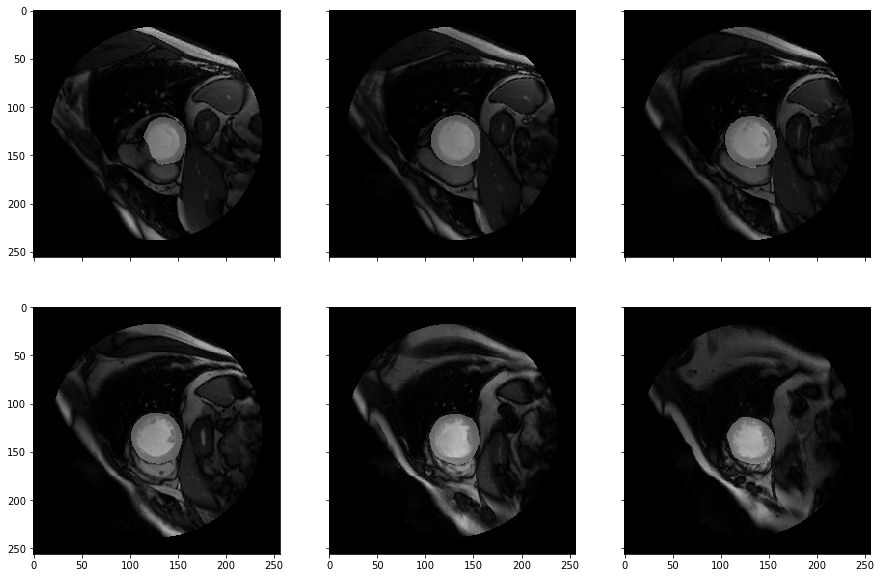

In [32]:
# Visualize a sample
fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

for idx, ax in enumerate(ax.flatten()):
    ax.imshow(dicom_data[idx], cmap=plt.cm.gray)
    ax.imshow(contours_data[idx], alpha=0.3, cmap=plt.cm.gray)

## Summary - i-Contours / O-Contours

from the images above, it looks like O-Contours are around the I-Contours region.  Hence it may be possible to get I-Contours, given the O-Contours.  This is done in a Separate Notebook

## Lets Extract Both I-Contors and O-Contours and overlay them

In [33]:
contour_extractor = ContourFileExtractor(contour_top_folder, dicom_top_folder, 
                                         primary_contour="o-contours",
                                         contour_dicom_folder_map=contour_dicom_map,
                                         on_error_action="log",
                                         secondary_contours=["i-contours"])

In [34]:
contours_generator = contour_extractor.datasets_generator(shuffle=True)

In [35]:
## Use in Dataset
contours_dset = ContourDataset(contour_dicom_generator=contours_generator,
                              x_channels=["dicom", "o-contours"],
                              y_channels="i-contours",
                              include_sources=False)

In [36]:
for dicom_data, contours_data in contours_dset.generate_batch(batch_size=8, shuffle=True):
    ## Model Training with Inputs and target for each batch
    break

Dataset failed validation data/final_data/contourfiles/SC-HF-I-6/o-contours/IM-0001-0079-ocontour-manual.txt


In [56]:
# Change this if you run it locally.  This is not the only file that's got the incorrect contours
invalid_contour_file = "data/final_data/contourfiles/SC-HF-I-6/o-contours/IM-0001-0079-ocontour-manual.txt"

### Assumption that I-Contour Boundaries are contained in O-Contour doesn't hold for ALL files

In [59]:
## Let's bypass the validation to see how they look
## Use in Dataset
contour_extractor = ContourFileExtractor(contour_top_folder, dicom_top_folder, 
                                         primary_contour="o-contours",
                                         contour_dicom_folder_map=contour_dicom_map,
                                         on_error_action="log",
                                         dataset_validator=lambda x: True,  # Bypass dataset Validation
                                         secondary_contours=["i-contours"])

contours_generator = contour_extractor.datasets_generator(shuffle=True)
## Use in Dataset
contours_dset = ContourDataset(contour_dicom_generator=contours_generator,
                              x_channels=["dicom", "o-contours"],
                              y_channels="i-contours",
                              include_sources=True)  # Include the Source files to visulalize incorrect data

In [60]:
for sources, X_data, y_data in contours_dset.generate_batch(batch_size=6, shuffle=True):
    ## Model Training with Inputs and target for each batch
    ocontour_sources = [source["o-contours"] for source in sources]
    if invalid_contour_file in ocontour_sources:
        # Found an instance of invalid contour file, let's break and visualize
        print("Found an instance of invalid contour file: {}, let's break and visualize".format(invalid_contour_file))
        break

Found an instance of invalid contour file: data/final_data/contourfiles/SC-HF-I-6/o-contours/IM-0001-0079-ocontour-manual.txt, let's break and visualize


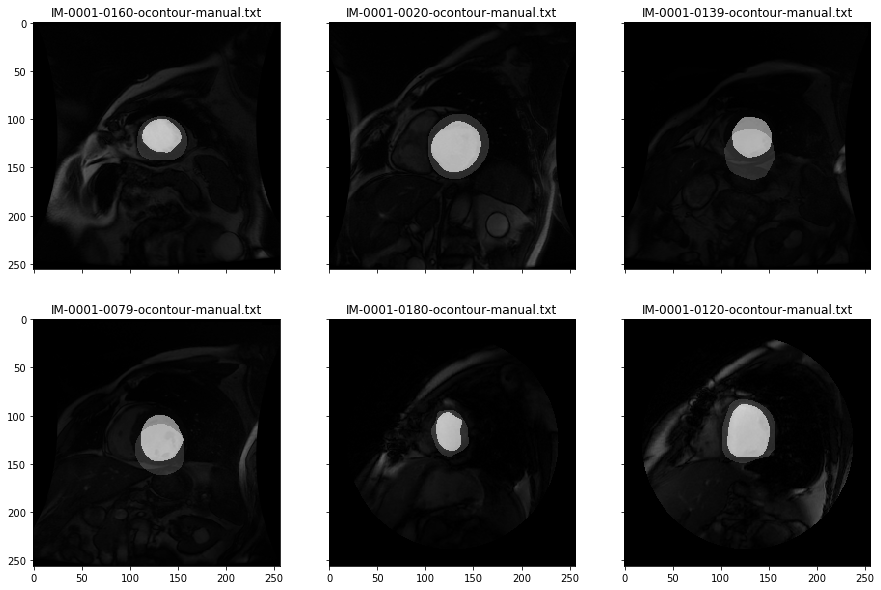

In [68]:
# Visualize a sample
fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

for idx, ax in enumerate(ax.flatten()):
    ax.imshow(X_data[idx][0], cmap=plt.cm.gray)  # Dicom
    ax.imshow(X_data[idx][1], alpha=0.3, cmap=plt.cm.gray)  # O-Contour
    ax.imshow(y_data[idx], alpha=0.5, cmap=plt.cm.gray)  # I-Contour    
    filename = sources[idx]["o-contours"].split("/")[-1]
    ax.set_title(filename)

### Let's see if O-Contour or I-Contours may have been corectly defined for these images

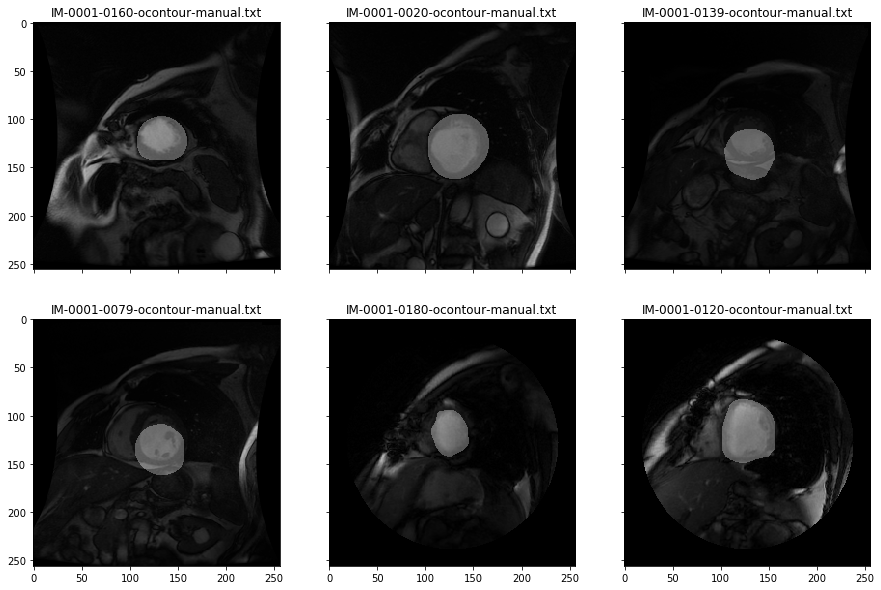

In [70]:
# Plot O-Contours

fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

for idx, ax in enumerate(ax.flatten()):
    ax.imshow(X_data[idx][0], cmap=plt.cm.gray)  # Dicom
    ax.imshow(X_data[idx][1], alpha=0.3, cmap=plt.cm.gray)  # O-Contour
#     ax.imshow(y_data[idx], alpha=0.5, cmap=plt.cm.gray)  # I-Contour    
    filename = sources[idx]["o-contours"].split("/")[-1]
    ax.set_title(filename)

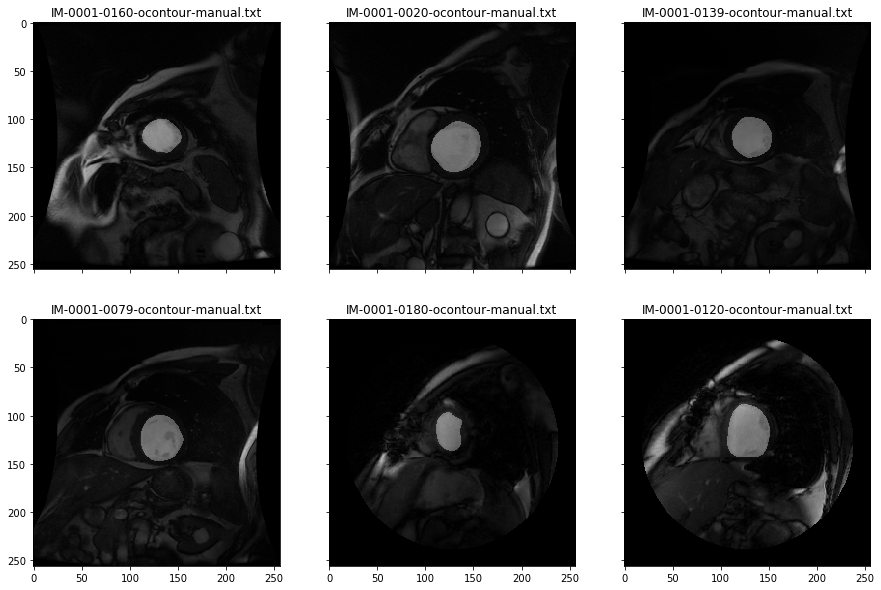

In [72]:
## Plot I-Contour is corectly defined for the same images

fig, ax = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

for idx, ax in enumerate(ax.flatten()):
    ax.imshow(X_data[idx][0], cmap=plt.cm.gray)  # Dicom
#     ax.imshow(X_data[idx][1], alpha=0.3, cmap=plt.cm.gray)  # O-Contour
    ax.imshow(y_data[idx], alpha=0.3, cmap=plt.cm.gray)  # I-Contour    
    filename = sources[idx]["o-contours"].split("/")[-1]
    ax.set_title(filename)

#### From the above plots, it does look like O-Contours is the one that's incorrect marked in these images

## Summary:

As you can see Two of the Contours (0139 and 0079) invalidates our assumption that I-Contours are inside O-Contours.  In the next step, we will exclude these files when we try to estimate I-Contour from O-Contours